In [1]:
import pandas as pd
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
data= pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
data.sample(5)
#class is 0 for normal transaction and 1 for fraud transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206948,136455.0,0.875675,-2.805125,-1.571968,0.959025,-0.987060,0.943942,-0.158304,0.099022,-0.121059,...,0.245899,-0.030538,-0.501813,0.010183,-0.087075,-0.456612,-0.057689,0.058375,628.26,0
278884,168501.0,-1.039532,0.672878,1.306542,-0.470189,0.732873,2.392692,-0.513036,1.142792,-0.576664,...,0.315514,0.981659,-0.378761,-0.838039,0.298256,0.951624,-0.035803,-0.032674,11.50,0
263989,161211.0,-1.023649,0.024153,3.106933,0.170910,-0.631225,2.340448,-0.686166,0.255085,0.448022,...,-0.367829,0.390976,-0.514690,0.245571,0.519079,-0.251249,-0.021630,-0.199461,30.00,0
150412,93299.0,1.895658,-0.208899,-1.866933,0.212367,0.559513,-0.839217,0.544021,-0.523430,1.874162,...,0.008301,0.210053,-0.088652,0.460169,0.384418,-0.515914,-0.062094,-0.040662,121.88,0
191017,129073.0,-0.506063,-0.053900,1.689069,-0.833582,0.235912,-0.069824,0.203382,0.057938,0.456133,...,0.286369,0.945541,-0.262007,-0.295208,-0.316135,0.689347,-0.084540,-0.086272,26.19,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum().sum()

0

In [6]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

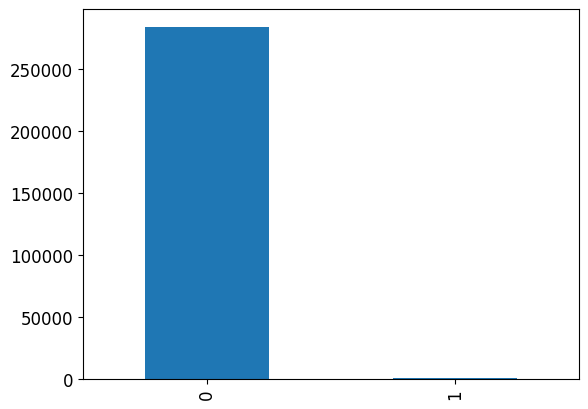

In [7]:
data["Class"].value_counts().plot(kind='bar')

## Prepare the Data for Classification

In [3]:
# make features in X matrix, label y matrix
X= data.drop('Class', axis=1)
y= data['Class']

In [4]:

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

# Oversample

In [10]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(X_train, y_train)# only for training

In [11]:
print(f'new label count: {transformed_label_df.value_counts()}')

print('-------------')

print(f'old label count: {data.Class.value_counts()}')

new label count: 0    227451
1    227451
Name: Class, dtype: int64
-------------
old label count: 0    284315
1       492
Name: Class, dtype: int64


In [12]:
print(f'Label Shape: {transformed_label_df.shape}')

print('-------------')

print(f'Features Shape: {transformed_feature_df.shape}')

Label Shape: (454902,)
-------------
Features Shape: (454902, 30)


# LogisticRegression

In [16]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(transformed_feature_df)
X_test_normalized = scaler.transform(X_test)

In [18]:
lgr_model = LogisticRegression()
lgr_model.fit(X_train_normalized, transformed_label_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = lgr_model.predict(X_test_normalized)

In [20]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9890804395913065


# Measuring Accuracy Using Cross-Validation

In [21]:
cross_val_score(lgr_model, X_train_normalized, transformed_label_df, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.97499242, 0.97414168, 0.97491987])

In [22]:
##Confusion Matrix with
cm = confusion_matrix(y_test, y_pred)
cm

array([[56252,   612],
       [   10,    88]])

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



# RandoForest

In [10]:
# Initialize and train classifiers
random_forest_classifier = RandomForestClassifier(n_estimators=20, random_state=7)

In [11]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=7)

In [12]:
# Evaluate classifier on the cross-validation set
cross_val_score(random_forest_classifier, X_train, y_train, cv=5, scoring="accuracy")

array([0.99934166, 0.99958305, 0.99953916, 0.99956111, 0.99953916])

In [13]:
# Make predictions
y_pred_f = random_forest_classifier.predict(X_test)

In [14]:
#In test set
cm= confusion_matrix(y_test, y_pred_f)
cm

array([[56861,     3],
       [   24,    74]])

In [16]:
print(classification_report(y_test,y_pred_f))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# XGBClassifier

> Try another model, without oversampling immbalance class, Gradient boosting algorithms like XGBoost and LightGBM they can be fine-tuned to handle imbalanced datasets and capture intricate fraud patterns.

In [5]:
# Create and train the XGBoost model
xgb_model = XGBClassifier(
    objective="binary:logistic",
    n_estimators=20,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3  # Maximum depth of the tree
)

In [6]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[56857     7]
 [   31    67]]


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9993328885923949
Precision: 0.9054054054054054
Recall: 0.6836734693877551
F1 Score: 0.7790697674418605
